In [1]:
import torch

from data import Data
import plot
import utils

from torch.utils.data import DataLoader

In [2]:
dataset = Data('3DAuAu200_minimumbias_BG16_tune17') + Data('NetbaryonDis_OSG3DAuAu200_tune18.6_wBulk_22momdeltaf_wHBT')

data_loader = DataLoader(
    dataset=dataset,
    shuffle=True,
)

In [3]:
model  = torch.load('./baryon_model_200gev.pt')
model.eval()

BaryonModel(
  (linear): Linear(in_features=141, out_features=141, bias=True)
)

In [4]:
initial_inputs = []
actual_outputs = []
model_outputs = []

for i, data in enumerate(data_loader):
    protons = data[0].flatten()
    dNch_deta_final = data[1].flatten()
    x_axis = dataset.data_axis

    outputs = model(protons.float())

    actual_outputs.append(utils.compute_integral(dNch_deta_final, x_axis, -1, 1))
    model_outputs.append(utils.compute_integral(outputs.detach().numpy(), x_axis, -1, 1))

In [5]:
actual_moments = utils.Moments(actual_outputs)
generated_moments = utils.Moments(model_outputs)

print(actual_moments.var)
print(actual_moments.var_error)

print(actual_moments.skew)
print(actual_moments.skew_error)

print(actual_moments.kurt)
print(actual_moments.kurt_error)

print()

print(generated_moments.var)
print(generated_moments.var_error)

print(generated_moments.skew)
print(generated_moments.skew_error)

print(generated_moments.kurt)
print(generated_moments.kurt_error)

10.796146599151223
0.31746863036236117
0.6407216959762267
0.47355506538133385
2.6239014826616294
2.1814118523757675

10.708517647369874
0.30880040359692695
0.6167327203388004
0.4513103882737306
2.5616819583334483
1.9587688047912315


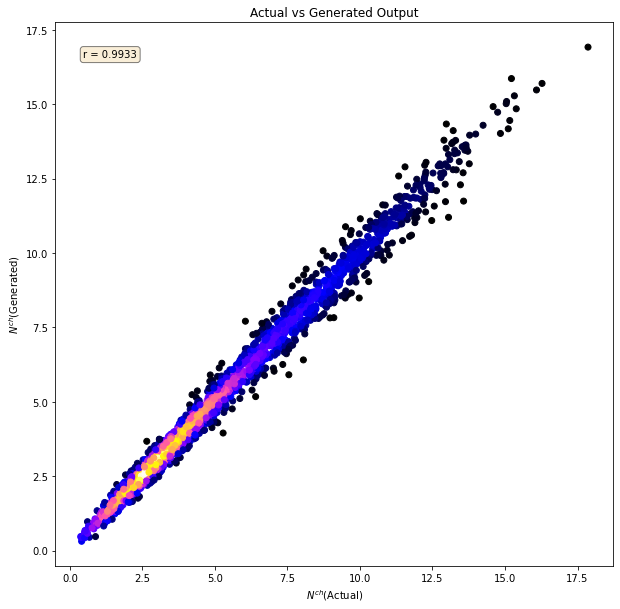

In [6]:
plot.plot_cc_graph('Actual vs Generated Output', 'Generated', actual_outputs, model_outputs)